> # **SUPPORT VECTOR MACHINES (SVM)**
> A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing `linear or nonlinear classification, regression, and even outlier detection`. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are `particularly well suited for classification of complex but small- or medium-sized datasets`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

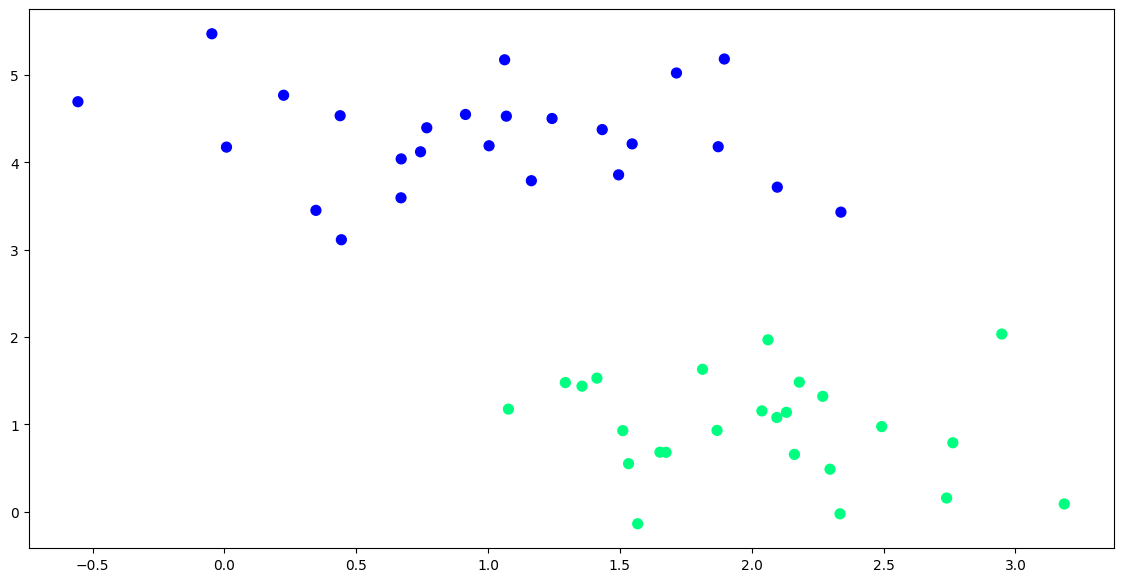

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.show()

<hr>

> ### HARD MARGIN SVM
> - Hard Margin Support Vector Machine (SVM) is a type of SVM used for classification tasks when the data is `linearly separable`, meaning that there is a clear boundary that can separate the classes without any errors. 
> - The goal of a hard margin SVM is to find the hyperplane that `maximizes the margin` between the two classes.
> - Hard margin SVM `does not allow for any misclassification of training examples`. All training examples must be correctly classified, hence the term "hard margin."

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""

    # If the ax parameter is not provided (None), it sets ax to the current active Matplotlib Axes object (plt.gca()), which is used to plot.
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=70, linewidth=1, facecolors="black", label = "Support Vectors")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend()

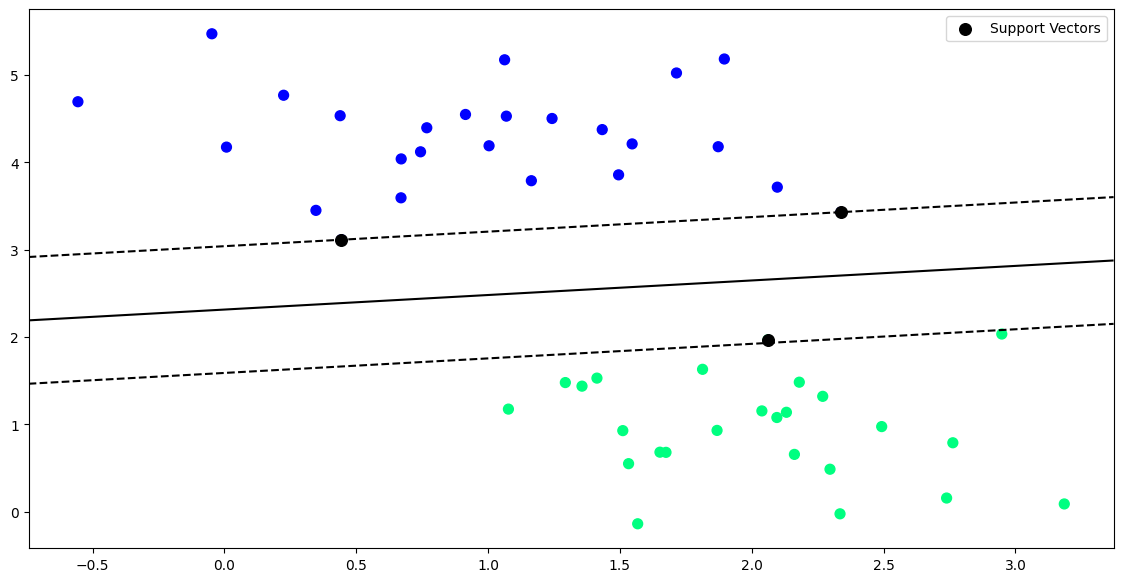

In [5]:
plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

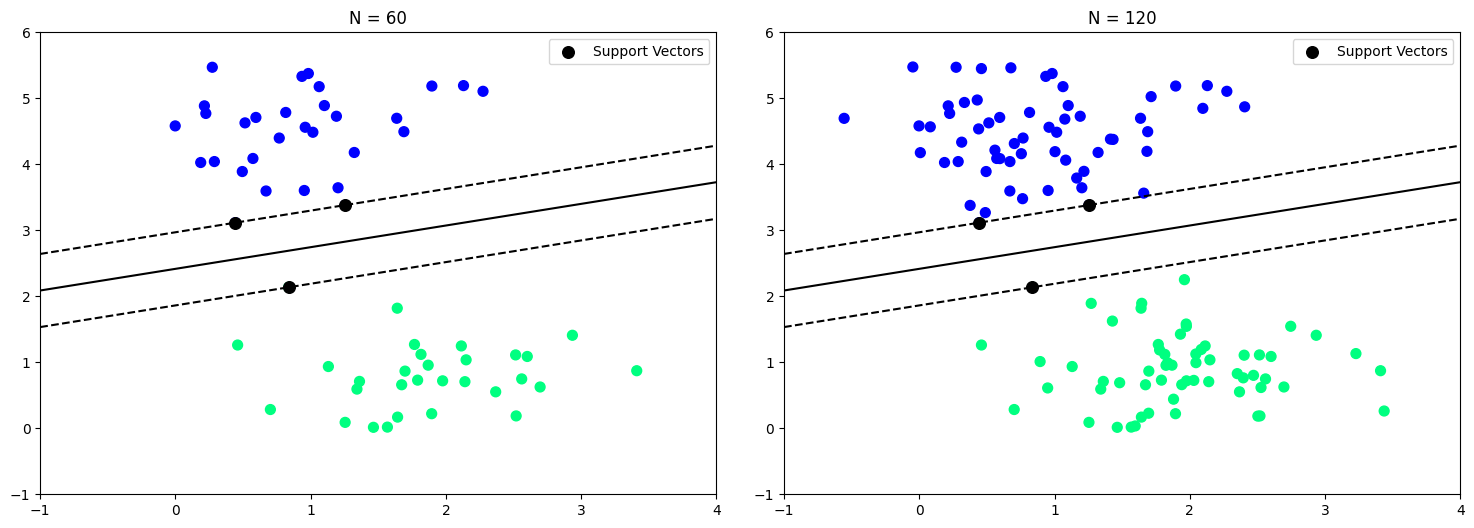

In [6]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

> - SVM totally `dependent on the Support Vectors`, Irrespective of the number of other datapoints

In [7]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

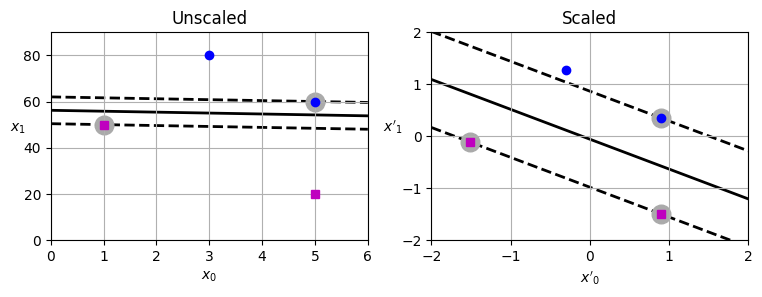

In [8]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

> - After scaling more number of support vectors get involved in the decision boundries. Therefore `Scaling does affect a lot in SVM`.
.<br><br>
> - But in real life the data is not perfectly linearly seperable, Therefore `Hard Margin SVM approach fails when the data is not linear or the data contains outliers`.

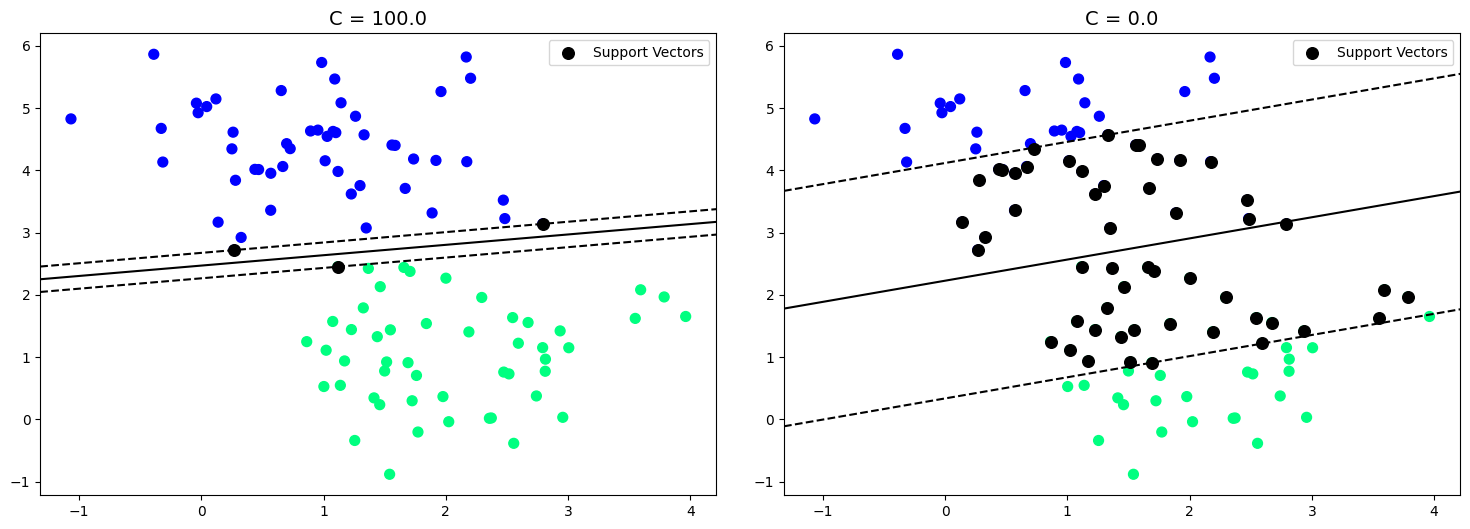

In [9]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

> - As you increase the value of 𝐶, the impact of the classification loss becomes more significant compared to the marginal loss. This happens because the model focuses more on reducing the classification errors, prioritizing accurate predictions over maximizing the margin between classes.<br><br>
> - Conversely, when you decrease 𝐶, the impact of the marginal loss becomes more prominent compared to the classification loss. In this case, the model emphasizes increasing the margin between classes, which can lead to a higher tolerance for classification errors in favor of a wider margin. This adjustment helps the model better handle the interference of data points near the decision boundary.

<hr>

> ### SOFT MARGIN SVM
> A soft margin SVM (Support Vector Machine) is a type of classifier used to handle cases where data isn't perfectly separable. `Basically it expands the dimention of data in order to seperate the categories`. It allows some misclassifications by introducing a penalty for each error, controlled by a parameter 
𝐶. This approach balances between maximizing the margin and minimizing classification errors, making it more flexible and robust against noisy or overlapping data. The ultimate goal is to find a hyperplane that best separates the data while allowing some margin of error.

> One approach to handling nonlinear datasets is to add more features, such as `polynomial features`

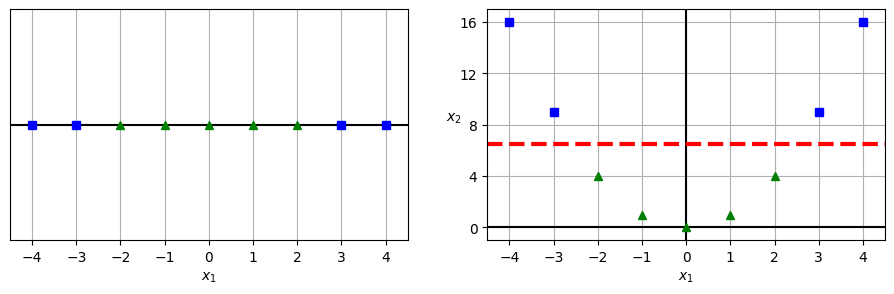

In [10]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2] # Square
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

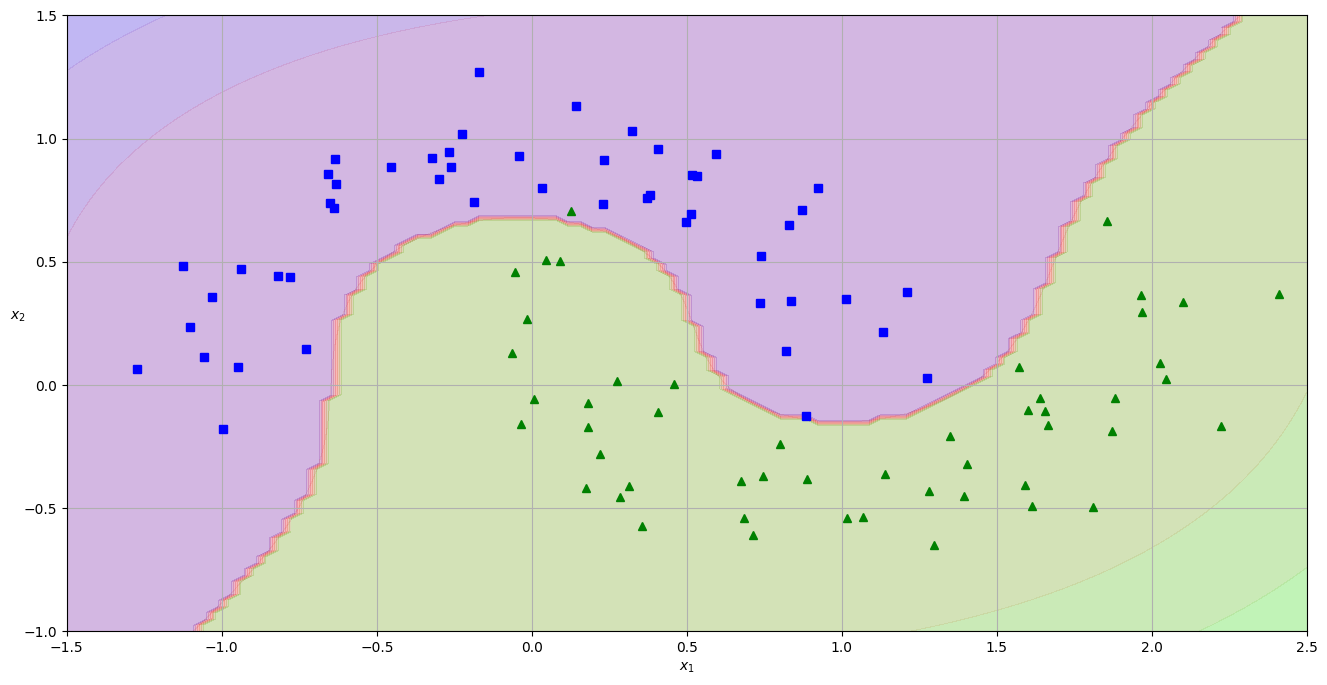

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(16, 8))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

<hr>

> #### POLYNOMIAL KERNALS
> - Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.<BR><BR>
> - Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the `kernel trick`. It makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don’t actually add any features

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

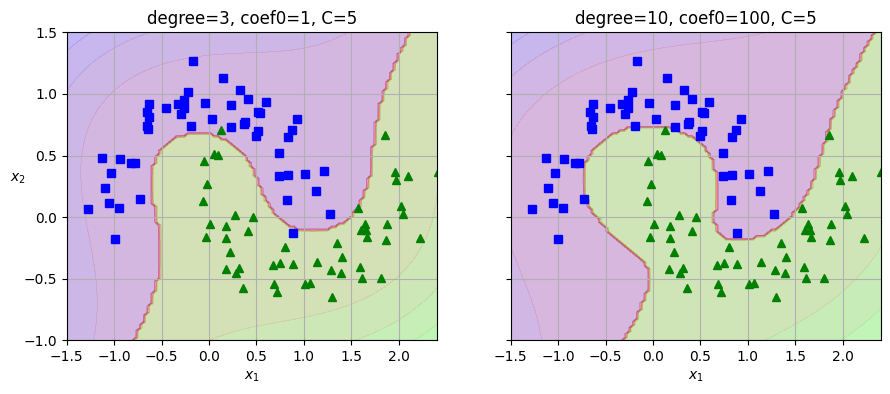

In [14]:
# extra code – this cell generates and saves Figure 5–7

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

> if your model is overfitting, you might want to reduce the polynomial degree Conversely, if it is underfitting, you can try increasing it. The hyperparameter `coef0 controls how much the model is influenced by high degree polynomials versus low-degree polynomials`.
<hr>

> #### RBF KERNELS
> The `Radial Basis Function` (RBF) kernel, also known as the `Gaussian kernel`, is a common choice in SVMs for `handling non-linear classification problems`. The RBF kernel function `measures the similarity between two data points` based on their distance from each other in the input space.<br><br>
> HYPERPARAMETERS - <br><br>
> 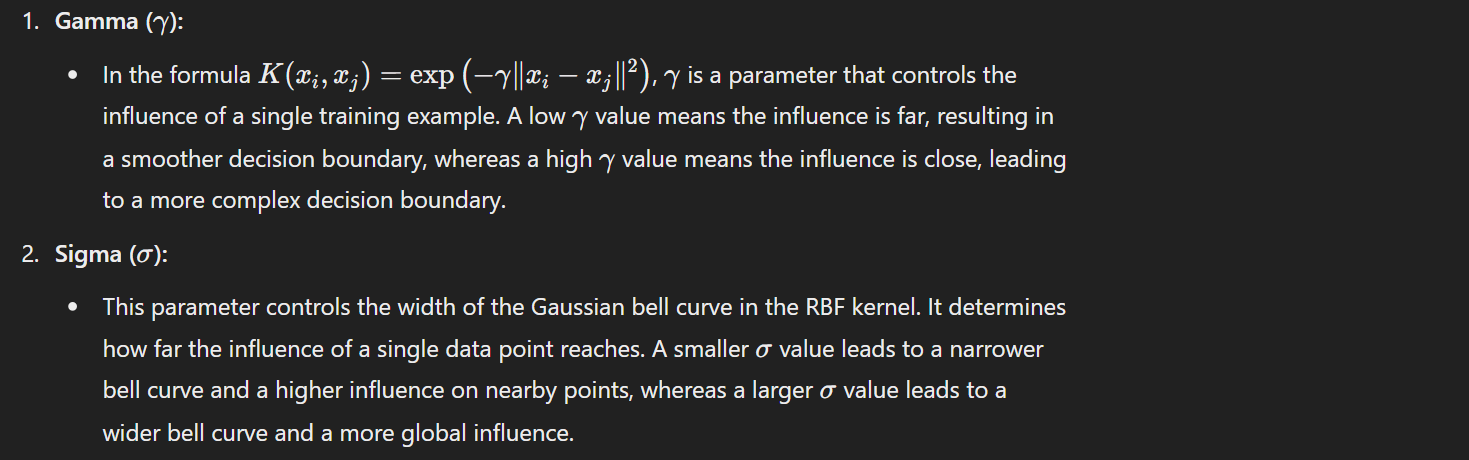
>  `γ acts like a regularization hyperparameter`: if your model is `overfitting`, you should `reduce it`, and if it is `underfitting`, you should `increase` it (similar to the C hyperparameter).

In [15]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

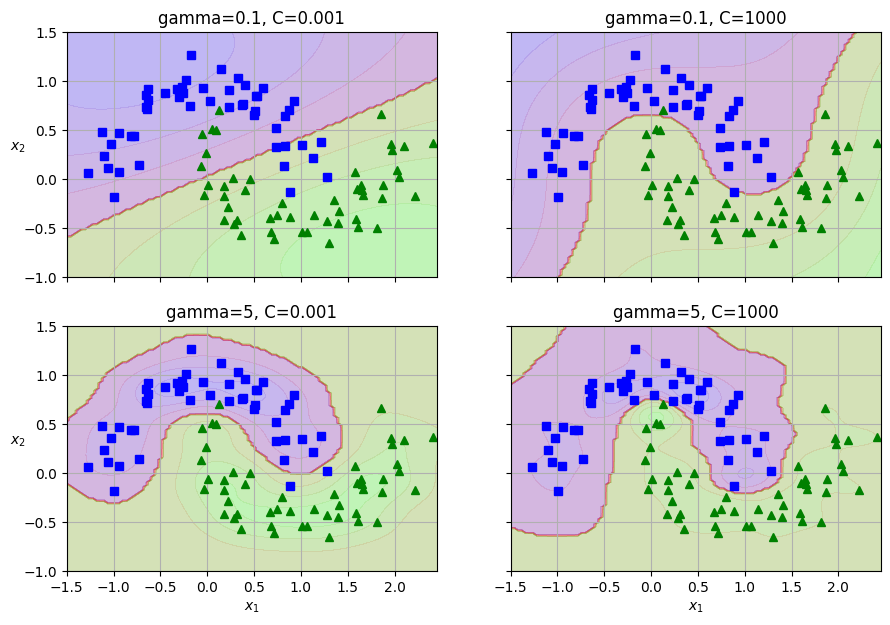

In [16]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

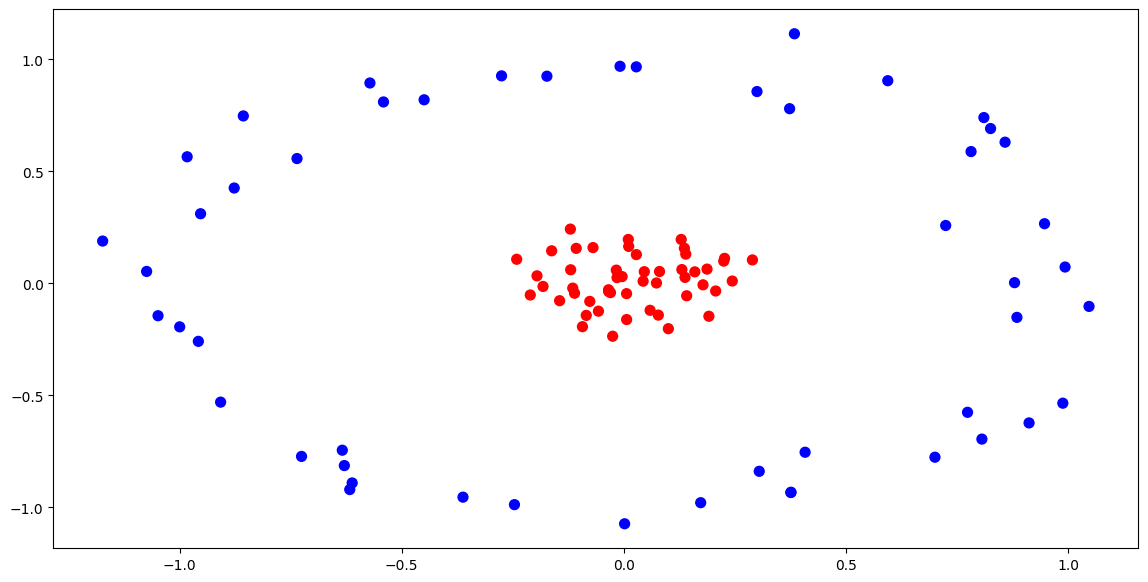

In [18]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X, y = make_circles(100, factor=.1, noise=.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [20]:
model = SVC(kernel = 'rbf', C = 10, gamma = 10)
model.fit(X_train, y_train)

SVC(C=10, gamma=10)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

1.0

In [23]:
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\shrir\AppData\Local\Temp\ipykernel_568\2013136073.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


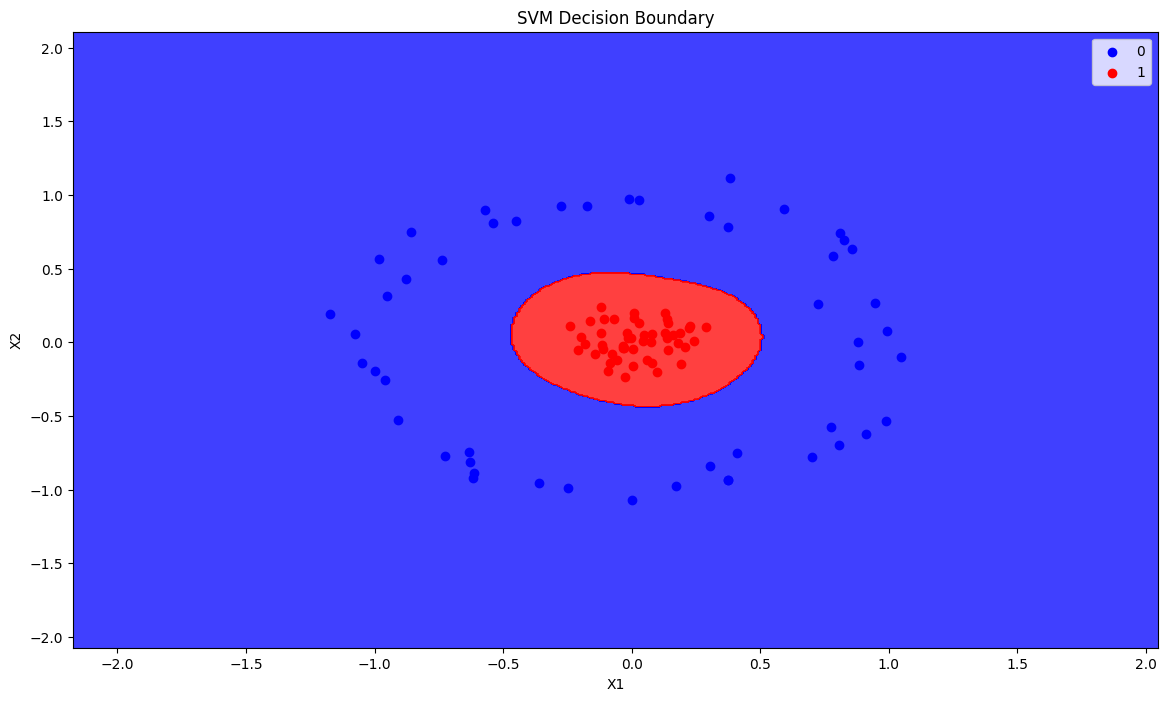

In [25]:
plt.figure(figsize=(14, 8))
plot_decision_boundary(X, y, model)

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

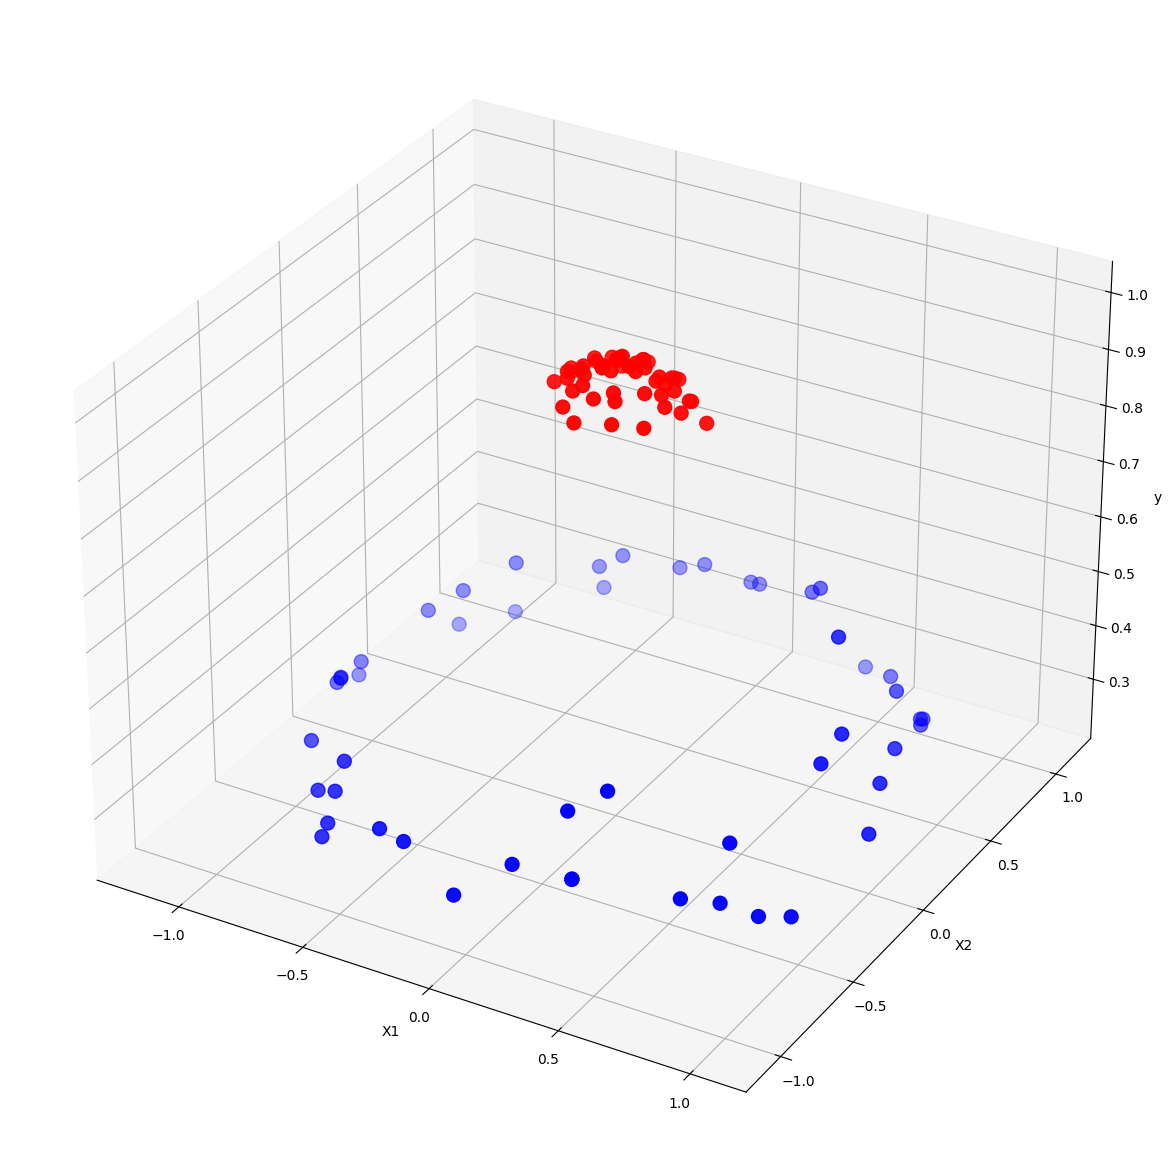

In [29]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.figure.set_figwidth(15)
    ax.figure.set_figheight(15)
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

plot_3d_plot(X,y)

<hr>